In [1]:
from datetime import datetime

import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot


Bad key "text.kerning_factor" on line 4 in
/Users/nmm/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
data = pd.read_csv("data/clean_waste_data.csv")
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [4]:
data.head()

,date,year,month,wday,Load.Type,Route.Type,Dropoff.Site,Route.Number,outlier,total_pop,annualised_growth,nb_loads,daily_weight
0,2005-01-03,2005,1,Mon,BRUSH,BRUSH,HORNSBY BEND,BR05,normal,700407.0,1.20%,2,8000.0
1,2005-01-03,2005,1,Mon,BRUSH,BRUSH,HORNSBY BEND,BR05,outlier,700407.0,1.20%,1,9400.0
2,2005-01-03,2005,1,Mon,BRUSH,BRUSH,HORNSBY BEND,BRPN01,outlier,700407.0,1.20%,1,3140.0
3,2005-01-03,2005,1,Mon,BRUSH,BRUSH,HORNSBY BEND,BRPS01,normal,700407.0,1.20%,1,5640.0
4,2005-01-03,2005,1,Mon,BULK,BULK,STEINER LANDFILL,BU27,normal,700407.0,1.20%,1,4620.0


In [52]:
filtered_data = data[(((data['Load.Type'] == "GARBAGE COLLECTIONS") & (data['Route.Type'] == "GARBAGE COLLECTION")) |
              ((data['Load.Type'] == "RECYCLING - SINGLE STREAM") & (data['Route.Type'] == "RECYCLING - SINGLE STREAM"))) &
                 (data['outlier'] == "normal")  & (data['year']>2010) ]

In [21]:
filtered_data['Route.Number'].value_counts()

PAT72     869
PAF79     868
PAT69     867
PAT61     867
PAT04     864
         ... 
PW87        1
PF87        1
HNONSG      1
FNONGL      1
WNONGL      1
Name: Route.Number, Length: 735, dtype: int64

In [53]:
df_gc = filtered_data[filtered_data['Load.Type'] == "GARBAGE COLLECTIONS"].groupby('date')['daily_weight'].sum().reset_index()
df_gc.columns = ['ds', 'y']
df_gc.head()

,ds,y
0,2011-01-03,1295680.0
1,2011-01-04,1163700.0
2,2011-01-05,1136920.0
3,2011-01-06,826400.0
4,2011-01-07,1121920.0


In [54]:
df_rec = filtered_data[filtered_data['Load.Type'] == "RECYCLING - SINGLE STREAM"].groupby('date')['daily_weight'].sum().reset_index()
df_rec.columns = ['ds', 'y']
df_rec.head()

,ds,y
0,2011-01-03,576260.0
1,2011-01-04,398440.0
2,2011-01-05,466660.0
3,2011-01-06,434380.0
4,2011-01-07,496520.0


In [70]:
m_gc = Prophet()
m_gc.fit(df_gc);
future_gc = m_gc.make_future_dataframe(periods=365*10);

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [71]:
forecast_gc = m_gc.predict(future_gc)
forecast_gc[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail();

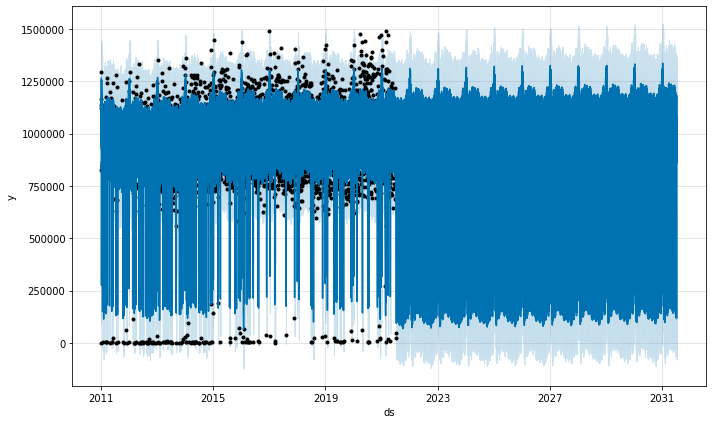

In [72]:
fig1_gc = m_gc.plot(forecast_gc)

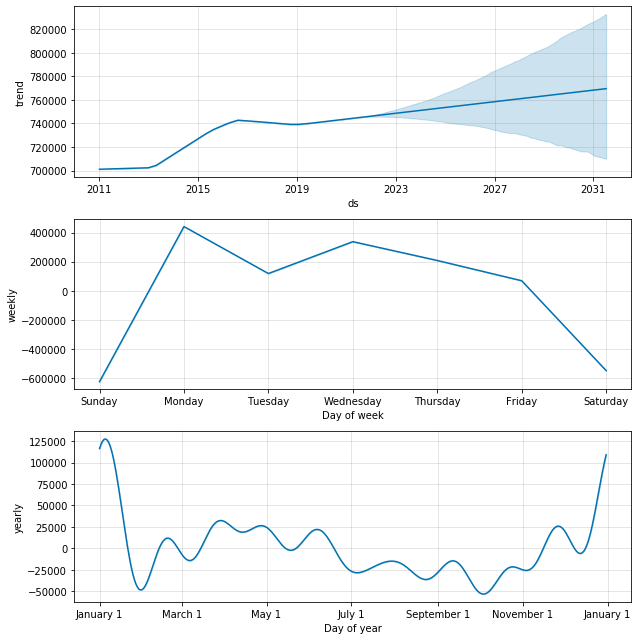

In [73]:
fig2_gc = m_gc.plot_components(forecast_gc)

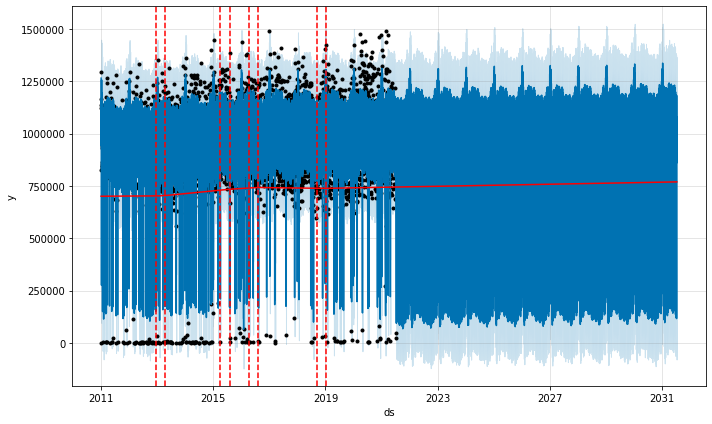

In [74]:
a = add_changepoints_to_plot(fig1_gc.gca(),m_gc,forecast_gc)
fig1_gc

In [75]:
m_rec = Prophet()
m_rec.fit(df_rec);
future_rec = m_rec.make_future_dataframe(periods=365*10);

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [76]:
forecast_rec = m_rec.predict(future_rec)
forecast_rec[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail();

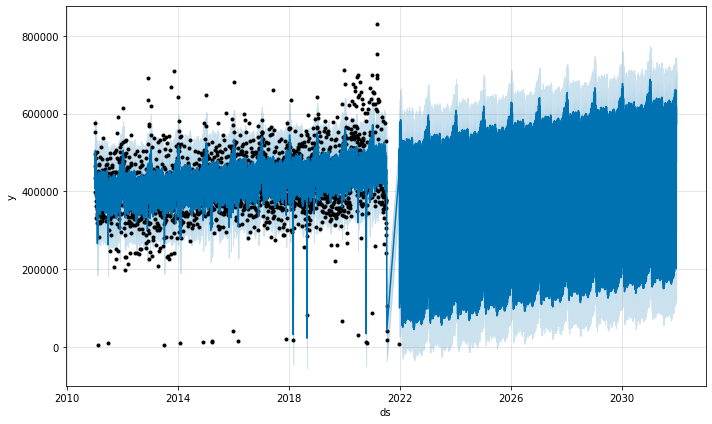

In [77]:
fig1_rec = m_rec.plot(forecast_rec)

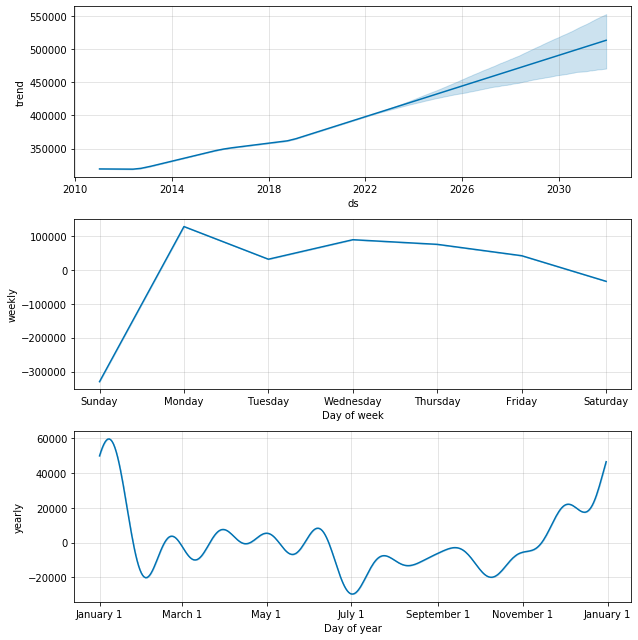

In [78]:
fig2_rec = m_rec.plot_components(forecast_rec)

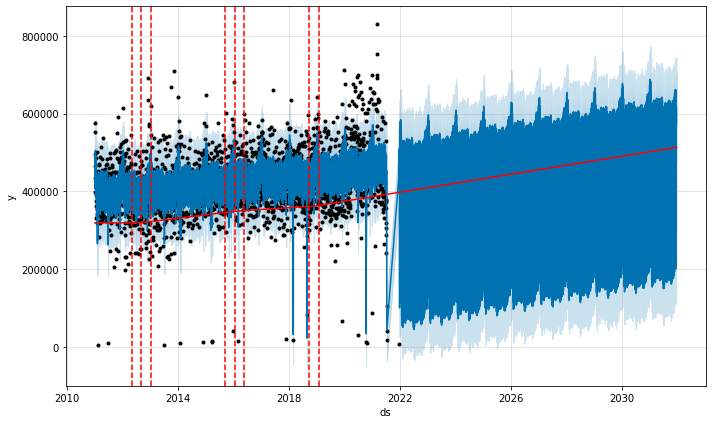

In [79]:

a = add_changepoints_to_plot(fig1_rec.gca(),m_rec,forecast_rec)
fig1_rec